In [7]:
!python3 -m pip freeze | grep xlrd

xlrd==1.2.0


In [9]:
!python3 -m pip freeze | grep openpy

openpyxl==3.0.5


# Использование библиотеки pandas для анализа описаний уязвимостей из банка данных ФСТЭК

Возможности использования библиотеки pandas для работы с информацией из банка данных ФСТЭК (bdu.fstec.ru) об угрозах (thrlist.xlsx) и уязвимостях (vullist.xlsx)

Для работы можно использовать открытый ресурс google colab с уже предустановленным программным обеспечением.

Необхоимые библиотеки:
- pandas
- xlrd
- openpyxls

## Содержание <a name='toc'></a>
<ul>
    <a href='#load'>Загрузка данных с сайта</a>
</ul>
<ul>
    <a href='#thrlist'>Анализ файла угроз thrlist.xlsx</a>
</ul>
<ul>
    <a href='#vullist'>Анализ файла уязвимостей vullist.xlsx</a>
</ul>
<ul>
    <a href='#refs'>Ссылки</a>
</ul>

## Загрузка файлов с сайта <a name='load'></a>

На официальном сайте ФСТЭК опубликованы списки угроз (thrlist.xlsx) и уязвимостей (vullist.xlsx) в эксель файлах.
Загрузим их.

In [1]:
!wget https://bdu.fstec.ru/files/documents/thrlist.xlsx
!wget https://bdu.fstec.ru/files/documents/vullist.xlsx

--2021-02-22 09:53:29--  https://bdu.fstec.ru/files/documents/thrlist.xlsx
Resolving bdu.fstec.ru (bdu.fstec.ru)... 95.173.157.16
Connecting to bdu.fstec.ru (bdu.fstec.ru)|95.173.157.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94259 (92K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘thrlist.xlsx’

thrlist.xlsx        100%[===================>]  92.05K  --.-KB/s    in 0.08s   

2021-02-22 09:53:29 (1.18 MB/s) - ‘thrlist.xlsx’ saved [94259/94259]

--2021-02-22 09:53:29--  https://bdu.fstec.ru/files/documents/vullist.xlsx
Resolving bdu.fstec.ru (bdu.fstec.ru)... 95.173.157.16
Connecting to bdu.fstec.ru (bdu.fstec.ru)|95.173.157.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5806439 (5.5M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘vullist.xlsx’

vullist.xlsx        100%[===================>]   5.54M   218KB/s    in 48s     

2021-02-22 09:54:18 (118 KB/s) 

Убедимся, что файлы появились в локальной директории. Для этого можно вызвать стаднатрную команду linux для просмотра содержимого директория ls, для этого перед командой в ячейке надо поставить "!".

In [2]:
!ls

 ARIMA.ipynb		       RNN.ipynb
 EDA.ipynb		       SQL_DB.ipynb
'GridSearchCV example.ipynb'   TensorFlow_basics.ipynb
 LICENSE		       Threat_Model_with_Pandas.ipynb
 NQueensTask.ipynb	       flask
 NetworkX.ipynb		       thrlist.xlsx
 README.md		       vullist.xlsx


Загружаем библиотеку pandas для работы с таблицами.

In [4]:
import pandas as pd

Создаем DataFrame из xlsx файла (пропускаем одну строчку, чтобы корректно отображались заголовки)

In [10]:
df = pd.read_excel("./thrlist.xlsx", skiprows=1, engine="openpyxl")

Отобразим первые три строки датафрейма.

In [11]:
df.head(3)

,Идентификатор УБИ,Наименование УБИ,Описание,Источник угрозы (характеристика и потенциал нарушителя),Объект воздействия,Нарушение конфиденциальности,Нарушение целостности,Нарушение доступности,Дата включения угрозы в БнД УБИ,Дата последнего изменения данных
0,1,Угроза автоматического распространения вредоно...,Угроза заключается в возможности внедрения и з...,Внешний нарушитель со средним потенциалом; Вну...,Ресурсные центры грид-системы,1,1,1,2015-03-20,2019-02-08
1,2,"Угроза агрегирования данных, передаваемых в гр...",Угроза заключается в возможности раскрытия нар...,Внешний нарушитель со средним потенциалом,Сетевой трафик,1,0,0,2015-03-20,2019-02-08
2,3,Угроза использования слабостей криптографическ...,Угроза заключается в возможности выявления сла...,Внешний нарушитель со средним потенциалом; Вну...,"Метаданные, системное программное обеспечение",1,1,0,2015-03-20,2020-11-29


Посмотрим размеры

In [12]:
df.shape

(222, 10)

Посмотрим перечень названий столбцов

In [16]:
for i,col in enumerate(df.columns):
    print(i+1,":",col)

1 : Идентификатор УБИ
2 : Наименование УБИ
3 : Описание
4 : Источник угрозы (характеристика и потенциал нарушителя)
5 : Объект воздействия
6 : Нарушение конфиденциальности
7 : Нарушение целостности
8 : Нарушение доступности
9 : Дата включения угрозы в БнД УБИ
10 : Дата последнего изменения данных


Итак, мы загрузили описания угроз и уязвимостей с официального сайта ФСТЭК в виде xlsx файлов и на основе их данных создали табличные структуры pandas.DataFrame. Далее будем анализировать содержимое этих таблиц методами библиотеки pandas.

<a href='#toc'>Назад к оглавлению</a>

## Анализ файла угроз thrlist.xlsx <a name='thrlist'></a>

Посмотрим информацию о столбцах таблицы

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Идентификатор УБИ                                        222 non-null    int64         
 1   Наименование УБИ                                         222 non-null    object        
 2   Описание                                                 222 non-null    object        
 3   Источник угрозы (характеристика и потенциал нарушителя)  220 non-null    object        
 4   Объект воздействия                                       222 non-null    object        
 5   Нарушение конфиденциальности                             222 non-null    int64         
 6   Нарушение целостности                                    222 non-null    int64         
 7   Нарушение доступности                                

Из полученного описания видим, что в таблице 10 столбцов, четыре из них целочисленные, два имеют тип "datetime", остальные являются строками.

Также видим, что в столбце "Источник угрозы" есть два пустых значения (NaN).

Выведем только те строки, для который угроза связана с нарушением целостности

In [17]:
df[df['Нарушение целостности']==1]

,Идентификатор УБИ,Наименование УБИ,Описание,Источник угрозы (характеристика и потенциал нарушителя),Объект воздействия,Нарушение конфиденциальности,Нарушение целостности,Нарушение доступности,Дата включения угрозы в БнД УБИ,Дата последнего изменения данных
0,1,Угроза автоматического распространения вредоно...,Угроза заключается в возможности внедрения и з...,Внешний нарушитель со средним потенциалом; Вну...,Ресурсные центры грид-системы,1,1,1,2015-03-20,2019-02-08
2,3,Угроза использования слабостей криптографическ...,Угроза заключается в возможности выявления сла...,Внешний нарушитель со средним потенциалом; Вну...,"Метаданные, системное программное обеспечение",1,1,0,2015-03-20,2020-11-29
3,4,Угроза аппаратного сброса пароля BIOS,Угроза заключается в возможности сброса пароле...,Внутренний нарушитель с низким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,0,1,0,2015-03-20,2019-02-08
4,5,Угроза внедрения вредоносного кода в BIOS,Угроза заключается в возможности заставить BIO...,Внутренний нарушитель с высоким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,1,1,1,2015-03-20,2019-02-08
5,6,Угроза внедрения кода или данных,Угроза заключается в возможности внедрения нар...,Внешний нарушитель с низким потенциалом,"Системное программное обеспечение, прикладное ...",1,1,1,2015-03-20,2019-02-08
...,...,...,...,...,...,...,...,...,...,...
214,215,Угроза несанкционированного доступа к системе ...,Угроза заключается в возможности осуществления...,Внешний нарушитель со средним потенциалом,Программное обеспечение (программы),1,1,1,2019-11-15,2019-11-15
215,216,Угроза получения несанкционированного доступа ...,Угроза заключается в возможности осуществления...,Внешний нарушитель со средним потенциалом,Программное обеспечение (программы),1,1,1,2019-11-15,2019-11-15
216,217,Угроза использования скомпрометированного дове...,Угроза заключается в возможности внедрения вре...,Внутренний нарушитель со средним потенциалом; ...,"Информационная система, файлы",1,1,1,2020-02-11,2020-02-11
220,221,Угроза модификации модели машинного обучения п...,Угроза заключается в возможности модификации (...,Внешний нарушитель с высоким потенциалом; Внут...,"Программное обеспечение (программы), использую...",0,1,0,2020-12-15,2020-12-16


Выведем только те строки, которые относятся к BIOS

In [19]:
df[df['Наименование УБИ'].apply(lambda x: x.find("BIOS"))!=-1]

,Идентификатор УБИ,Наименование УБИ,Описание,Источник угрозы (характеристика и потенциал нарушителя),Объект воздействия,Нарушение конфиденциальности,Нарушение целостности,Нарушение доступности,Дата включения угрозы в БнД УБИ,Дата последнего изменения данных
3,4,Угроза аппаратного сброса пароля BIOS,Угроза заключается в возможности сброса пароле...,Внутренний нарушитель с низким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,0,1,0,2015-03-20,2019-02-08
4,5,Угроза внедрения вредоносного кода в BIOS,Угроза заключается в возможности заставить BIO...,Внутренний нарушитель с высоким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,1,1,1,2015-03-20,2019-02-08
8,9,Угроза восстановления предыдущей уязвимой верс...,Угроза заключается в возможности осуществления...,Внутренний нарушитель с низким потенциалом,Микропрограммное обеспечение BIOS/UEFI,1,1,1,2015-03-20,2019-02-08
12,13,Угроза деструктивного использования деклариров...,Угроза заключается в возможности неправомерног...,Внутренний нарушитель с низким потенциалом,Микропрограммное обеспечение BIOS/UEFI,0,1,0,2015-03-20,2019-02-08
31,32,Угроза использования поддельных цифровых подпи...,Угроза заключается в возможности установки уяз...,Внешний нарушитель со средним потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,0,1,0,2015-03-20,2019-02-08
34,35,Угроза использования слабых криптографических ...,Угроза заключается в сложности проверки реальн...,Внешний нарушитель с высоким потенциалом,Микропрограммное обеспечение BIOS/UEFI,1,1,1,2015-03-20,2019-02-08
38,39,"Угроза исчерпания запаса ключей, необходимых д...",Угроза заключается в возможности нарушения (не...,Внешний нарушитель со средним потенциалом,Микропрограммное обеспечение BIOS/UEFI,0,1,0,2015-03-20,2019-02-08
44,45,Угроза нарушения изоляции среды исполнения BIOS,Угроза заключается в возможности изменения пар...,Внутренний нарушитель с низким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,1,1,1,2015-03-20,2019-02-08
52,53,Угроза невозможности управления правами пользо...,Угроза заключается в возможности неправомерног...,Внутренний нарушитель с низким потенциалом,Микропрограммное обеспечение BIOS/UEFI,1,1,1,2015-03-20,2019-02-11
71,72,Угроза несанкционированного выключения или обх...,Угроза заключается в возможности внедрения в B...,Внутренний нарушитель с низким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,1,1,1,2015-03-20,2019-02-11


Выведем угрозы за 2019 год

In [20]:
df[(df['Дата включения угрозы в БнД УБИ']>'2019-01-01')&(df['Дата включения угрозы в БнД УБИ']<'2020-01-01')]

,Идентификатор УБИ,Наименование УБИ,Описание,Источник угрозы (характеристика и потенциал нарушителя),Объект воздействия,Нарушение конфиденциальности,Нарушение целостности,Нарушение доступности,Дата включения угрозы в БнД УБИ,Дата последнего изменения данных
213,214,Угроза несвоевременного выявления и реагирован...,Угроза заключается в пропуске и/или значительн...,Внутренний нарушитель со средним потенциалом,"Программное обеспечение, каналы связи (передач...",0,1,1,2019-11-15,2019-11-15
214,215,Угроза несанкционированного доступа к системе ...,Угроза заключается в возможности осуществления...,Внешний нарушитель со средним потенциалом,Программное обеспечение (программы),1,1,1,2019-11-15,2019-11-15
215,216,Угроза получения несанкционированного доступа ...,Угроза заключается в возможности осуществления...,Внешний нарушитель со средним потенциалом,Программное обеспечение (программы),1,1,1,2019-11-15,2019-11-15


При попытке отфильтровать содержимое таблицы, оставив только те строки, которые содержать слово "высоким" в столбце "Источник угрозы (характеристика и потенциал нарушителя)", возникает ошибка.

Причина в том, что в двух ячейках столбца "Источник угрозы (характеристика и потенциал нарушителя)" были два пустых значения (NaN - "Not a number", специальное обозначение для пустого значения).

Далее по тексту мы это обнаружили и заменили пустые значения строкой "не задано".

In [21]:
df['Источник угрозы (характеристика и потенциал нарушителя)'].isna().sum()

2

In [22]:
df['Источник угрозы (характеристика и потенциал нарушителя)'].fillna("не задано", inplace=True)

In [23]:
df['Источник угрозы (характеристика и потенциал нарушителя)'].isna().sum()

0

Теперь все работает, оставим только строчки с высоким потенциалом нарушителя.

In [24]:
df[df['Источник угрозы (характеристика и потенциал нарушителя)'].str.contains("высоким")]

,Идентификатор УБИ,Наименование УБИ,Описание,Источник угрозы (характеристика и потенциал нарушителя),Объект воздействия,Нарушение конфиденциальности,Нарушение целостности,Нарушение доступности,Дата включения угрозы в БнД УБИ,Дата последнего изменения данных
4,5,Угроза внедрения вредоносного кода в BIOS,Угроза заключается в возможности заставить BIO...,Внутренний нарушитель с высоким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,1,1,1,2015-03-20,2019-02-08
23,24,Угроза изменения режимов работы аппаратных эле...,Угроза заключается в возможности изменения нар...,Внутренний нарушитель с высоким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,0,1,1,2015-03-20,2019-02-08
26,27,Угроза искажения вводимой и выводимой на периф...,Угроза заключается в возможности дезинформиров...,Внешний нарушитель с высоким потенциалом; Внут...,"Системное программное обеспечение, прикладное ...",0,1,0,2015-03-20,2019-02-08
34,35,Угроза использования слабых криптографических ...,Угроза заключается в сложности проверки реальн...,Внешний нарушитель с высоким потенциалом,Микропрограммное обеспечение BIOS/UEFI,1,1,1,2015-03-20,2019-02-08
86,87,Угроза несанкционированного использования прив...,Угроза заключается в возможности использования...,Внешний нарушитель с высоким потенциалом; Внут...,"Аппаратное обеспечение, микропрограммное обесп...",1,1,1,2015-03-20,2019-02-11
91,92,Угроза несанкционированного удалённого внеполо...,Угроза заключается в возможности получения нар...,Внешний нарушитель с высоким потенциалом,"Информационная система, аппаратное обеспечение",1,1,1,2015-03-20,2019-02-11
106,107,Угроза отключения контрольных датчиков,Угроза заключается в возможности обеспечения н...,Внешний нарушитель с высоким потенциалом; Внут...,Системное программное обеспечение,0,1,1,2015-03-20,2019-02-11
136,137,Угроза потери управления облачными ресурсами,Угроза заключается в возможности нарушения дог...,Внешний нарушитель с высоким потенциалом,"Сетевой трафик, объекты файловой системы",1,1,1,2015-03-20,2019-02-11
182,183,Угроза перехвата управления автоматизированной...,Угроза заключается в возможности осуществления...,Внешний нарушитель с высоким потенциалом; Внут...,Программное обеспечение автоматизированной сис...,0,1,1,2016-06-23,2019-02-11
193,194,Угроза несанкционированного использования прив...,Угроза заключается в возможности снятия наруши...,Внешний нарушитель с высоким потенциалом,Мобильное устройство,1,1,1,2016-12-01,2019-02-08


Двойное условие: 1) BIOS в "Наименовании УБИ" и 2) Нарушение конфиденциальности

In [25]:
df_result = df[(df['Наименование УБИ'].apply(lambda x: x.find("BIOS"))!=-1)&(df['Нарушение конфиденциальности']==1)]

In [26]:
df_result

,Идентификатор УБИ,Наименование УБИ,Описание,Источник угрозы (характеристика и потенциал нарушителя),Объект воздействия,Нарушение конфиденциальности,Нарушение целостности,Нарушение доступности,Дата включения угрозы в БнД УБИ,Дата последнего изменения данных
4,5,Угроза внедрения вредоносного кода в BIOS,Угроза заключается в возможности заставить BIO...,Внутренний нарушитель с высоким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,1,1,1,2015-03-20,2019-02-08
8,9,Угроза восстановления предыдущей уязвимой верс...,Угроза заключается в возможности осуществления...,Внутренний нарушитель с низким потенциалом,Микропрограммное обеспечение BIOS/UEFI,1,1,1,2015-03-20,2019-02-08
34,35,Угроза использования слабых криптографических ...,Угроза заключается в сложности проверки реальн...,Внешний нарушитель с высоким потенциалом,Микропрограммное обеспечение BIOS/UEFI,1,1,1,2015-03-20,2019-02-08
44,45,Угроза нарушения изоляции среды исполнения BIOS,Угроза заключается в возможности изменения пар...,Внутренний нарушитель с низким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,1,1,1,2015-03-20,2019-02-08
52,53,Угроза невозможности управления правами пользо...,Угроза заключается в возможности неправомерног...,Внутренний нарушитель с низким потенциалом,Микропрограммное обеспечение BIOS/UEFI,1,1,1,2015-03-20,2019-02-11
71,72,Угроза несанкционированного выключения или обх...,Угроза заключается в возможности внедрения в B...,Внутренний нарушитель с низким потенциалом,Микропрограммное и аппаратное обеспечение BIOS...,1,1,1,2015-03-20,2019-02-11
86,87,Угроза несанкционированного использования прив...,Угроза заключается в возможности использования...,Внешний нарушитель с высоким потенциалом; Внут...,"Аппаратное обеспечение, микропрограммное обесп...",1,1,1,2015-03-20,2019-02-11
122,123,Угроза подбора пароля BIOS,Угроза заключается в возможности осуществления...,Внутренний нарушитель с низким потенциалом,Микропрограммное обеспечение BIOS/UEFI,1,0,1,2015-03-20,2019-02-11
143,144,Угроза программного сброса пароля BIOS,Угроза заключается в возможности осуществления...,Внутренний нарушитель с низким потенциалом,"Микропрограммное обеспечение BIOS/UEFI, систем...",1,1,0,2015-03-20,2019-02-11
153,154,Угроза установки уязвимых версий обновления пр...,Угроза заключается в возможности внесения уязв...,Внешний нарушитель со средним потенциалом; Вну...,Микропрограммное обеспечение BIOS/UEFI,1,1,1,2015-03-20,2019-02-11


Запись результата в файл xls.

In [27]:
df_result.to_excel("name.xls")

In [28]:
!ls

 ARIMA.ipynb		       SQL_DB.ipynb
 EDA.ipynb		       TensorFlow_basics.ipynb
'GridSearchCV example.ipynb'   Threat_Model_with_Pandas.ipynb
 LICENSE		       flask
 NQueensTask.ipynb	       name.xls
 NetworkX.ipynb		       thrlist.xlsx
 README.md		       vullist.xlsx
 RNN.ipynb


Сохранить файл из виртуального диска Google Colab на локальный диск.

In [29]:
from google.colab import files

ModuleNotFoundError: No module named 'google'

In [29]:
files.download("name.xls")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
!ls

name.xls  sample_data  thrlist.xlsx  vullist.xlsx


<a href="#toc">Назад к оглавлению</a>

## Анализ файла с описанием уязвимостей vullist.xlsx <a name='vullist'></a>

In [31]:
df2 = pd.read_excel("vullist.xlsx", skiprows=2)

In [32]:
df2

,Идентификатор,Наименование уязвимости,Описание уязвимости,Вендор ПО,Название ПО,Версия ПО,Тип ПО,Наименование ОС и тип аппаратной платформы,Класс уязвимости,Дата выявления,CVSS 2.0,CVSS 3.0,Уровень опасности уязвимости,Возможные меры по устранению,Статус уязвимости,Наличие эксплойта,Информация об устранении,Ссылки на источники,Идентификаторы других систем описаний уязвимости,Прочая информация,Описание ошибки CWE,Тип ошибки CWE
0,BDU:2014-00001,Уязвимость микропрограммного обеспечения прогр...,Микропрограммное обеспечение модуля 140NOE7711...,Schneider Electric,Микропрограммное обеспечение программируемого ...,4.6 (Микропрограммное обеспечение программируе...,ПО программно-аппаратного средства АСУ ТП,Микропрограммное обеспечение программируемого ...,Уязвимость архитектуры,17.12.2011,AV:N/AC:L/Au:N/C:C/I:C/A:C,NaN,Критический уровень опасности (базовая оценка ...,Ограничение доступа к устройству по протоколу FTP,Подтверждена производителем,Существует,Информация об устранении отсутствует,http://ics-cert.us-cert.gov/alerts/ICS–ALERT–1...,CVE-2011-4859,Язык разработки ПО – С,Жесткое кодирование паролей,CWE-259
1,BDU:2014-00002,Уязвимость микропрограммного обеспечения маршр...,Скрипт «/scgi-bin/platform.cgi» микропрограммн...,D-Link Corp.,Микропрограммное обеспечение маршрутизатора D–...,1.02b11 (Микропрограммное обеспечение маршрути...,ПО сетевого программно-аппаратного средства,Микропрограммное обеспечение маршрутизатора D–...,Уязвимость кода,18.08.2013,AV:N/AC:L/Au:N/C:C/I:C/A:C,NaN,Критический уровень опасности (базовая оценка ...,Обновить программное обеспечение до версии 1.0...,Подтверждена производителем,Существует,Уязвимость устранена,http://www.exploit–db.com/papers/30061/,"CVE-2013-5946, OSVDB ID:100840, Bugtraq ID:641...",Язык разработки ПО – С,Проблемы обхода аутентификации,CWE-592
2,BDU:2014-00003,"Уязвимость браузера Opera, позволяющая злоумыш...","Браузер Opera содержит уязвимость, связанную с...",Opera Software ASA,Opera,до 11.65 включительно (Opera),Прикладное ПО информационных систем,"Windows (.), Mac OS (X)",Уязвимость архитектуры,14.06.2012,AV:N/AC:M/Au:N/C:C/I:C/A:C,NaN,Высокий уровень опасности (базовая оценка CVSS...,Обновление программного обеспечения до версии ...,Подтверждена производителем,Существует,Уязвимость устранена,http://www.opera.com/support/kb/view/1020/,"CVE-2012-3556, OSVDB ID:82952, Secunia Advisor...",Язык разработки ПО – С++,Недостаточная проверка вводимых данных,CWE-20
3,BDU:2014-00004,"Уязвимость браузера Firefox, позволяющая злоум...","Браузер Mozilla Firefox содержит уязвимость, к...",Mozilla Corp.,Firefox,12.0 (Firefox),Прикладное ПО информационных систем,"Linux (.), Windows (.)",Уязвимость архитектуры,06.05.2012,AV:N/AC:M/Au:N/C:N/I:P/A:N,NaN,Средний уровень опасности (базовая оценка CVSS...,Обновление программного обеспечения до версии ...,Подтверждена производителем,Данные уточняются,Уязвимость устранена,http://www.mozilla.org/security/announce/2012/...,"CVE-2012-1944, OSVDB ID:82672, Secunia Advisor...","Язык разработки программного средства – С++, X...",Непринятие мер по защите структуры веб-страниц...,CWE-79
4,BDU:2014-00005,"Уязвимость гипервизора VMware Workstation, поз...",Злоумышленник может получить контроль над выпо...,VMware Inc.,VMWare Workstation,"6.5 (VMWare Workstation), от 7.0.0 до 7.1.4 вк...",ПО виртуализации/ПО виртуального программно-ап...,Linux (.),Уязвимость архитектуры,04.04.2011,AV:L/AC:M/Au:N/C:C/I:C/A:C,NaN,Средний уровень опасности (базовая оценка CVSS...,Обновление программного обеспечения до версии ...,Подтверждена производителем,Данные уточняются,Уязвимость устранена,http://lists.vmware.com/pipermail/security-ann...,CVE-2011-1126,Язык разработки программного средства – С++,"Разрешения, привилегии и средства управления д...",CWE-264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31016,BDU:2021-00696,Уязвимость программного обеспечения для редакт...,Уязвимость программного обеспечения для редакт...,Adobe Systems 

In [33]:
df2.shape

(31021, 22)

In [34]:
df2.columns

Index(['Идентификатор', 'Наименование уязвимости', 'Описание уязвимости',
       'Вендор ПО', 'Название ПО', 'Версия ПО', 'Тип ПО',
       'Наименование ОС и тип аппаратной платформы', 'Класс уязвимости',
       'Дата выявления', 'CVSS 2.0', 'CVSS 3.0',
       'Уровень опасности уязвимости', 'Возможные меры по устранению',
       'Статус уязвимости', 'Наличие эксплойта', 'Информация об устранении',
       'Ссылки на источники',
       'Идентификаторы других систем описаний уязвимости', 'Прочая информация',
       'Описание ошибки CWE', 'Тип ошибки CWE'],
      dtype='object')

In [35]:
df2[df2['Вендор ПО'].apply(lambda x:x.find("D-Link"))!=-1]

,Идентификатор,Наименование уязвимости,Описание уязвимости,Вендор ПО,Название ПО,Версия ПО,Тип ПО,Наименование ОС и тип аппаратной платформы,Класс уязвимости,Дата выявления,CVSS 2.0,CVSS 3.0,Уровень опасности уязвимости,Возможные меры по устранению,Статус уязвимости,Наличие эксплойта,Информация об устранении,Ссылки на источники,Идентификаторы других систем описаний уязвимости,Прочая информация,Описание ошибки CWE,Тип ошибки CWE
1,BDU:2014-00002,Уязвимость микропрограммного обеспечения маршр...,Скрипт «/scgi-bin/platform.cgi» микропрограммн...,D-Link Corp.,Микропрограммное обеспечение маршрутизатора D–...,1.02b11 (Микропрограммное обеспечение маршрути...,ПО сетевого программно-аппаратного средства,Микропрограммное обеспечение маршрутизатора D–...,Уязвимость кода,18.08.2013,AV:N/AC:L/Au:N/C:C/I:C/A:C,NaN,Критический уровень опасности (базовая оценка ...,Обновить программное обеспечение до версии 1.0...,Подтверждена производителем,Существует,Уязвимость устранена,http://www.exploit–db.com/papers/30061/,"CVE-2013-5946, OSVDB ID:100840, Bugtraq ID:641...",Язык разработки ПО – С,Проблемы обхода аутентификации,CWE-592
328,BDU:2014-00329,Уязвимость микропрограммного обеспечения маршр...,Микропрограммное обеспечение маршрутизатора D–...,D-Link Corp.,Микропрограммное обеспечение маршрутизатора D–...,до версии 1.09 включительно (Микропрограммное ...,ПО сетевого программно-аппаратного средства,Микропрограммное обеспечение маршрутизатора D–...,Уязвимость архитектуры,01.10.2013,AV:N/AC:L/Au:N/C:C/I:C/A:C,NaN,Критический уровень опасности (базовая оценка ...,Использование статической ARP-таблицы или сист...,Подтверждена в ходе исследований,Существует в открытом доступе,Информация об устранении отсутствует,NaN,"CVE-1999-0667, OSVDB ID:12682",Язык разработки ПО – С,Недостаточная проверка вводимых данных,CWE-20
575,BDU:2015-00091,Уязвимость микропрограммного обеспечения маршр...,Скрипт «/scgi-bin/platform.cgi» микропрограммн...,D-Link Corp.,Микропрограммное обеспечение маршрутизатора D–...,1.05b29 (Микропрограммное обеспечение маршрути...,ПО сетевого программно-аппаратного средства,Микропрограммное обеспечение маршрутизатора D–...,Уязвимость кода,18.08.2013,AV:N/AC:L/Au:N/C:C/I:C/A:C,NaN,Критический уровень опасности (базовая оценка ...,Обновить программное обеспечение до версии 1.0...,Подтверждена производителем,Существует в открытом доступе,Уязвимость устранена,http://www.exploit-db.com/papers/30061/,"CVE-2013-5946, OSVDB ID:100840, Bugtraq ID:641...",Язык разработки ПО – С,Проблемы обхода аутентификации,CWE-592
576,BDU:2015-00092,Уязвимость микропрограммного обеспечения маршр...,Скрипт «/scgi-bin/platform.cgi» микропрограммн...,D-Link Corp.,Микропрограммное обеспечение маршрутизатора D–...,1.02b11 (Микропрограммное обеспечение маршрути...,ПО сетевого программно-аппаратного средства,Микропрограммное обеспечение маршрутизатора D–...,Уязвимость кода,18.08.2013,AV:N/AC:L/Au:N/C:C/I:C/A:C,NaN,Критический уровень опасности (базовая оценка ...,Обновить программное обеспечение до версии 1.0...,Подтверждена производителем,Существует в открытом доступе,Уязвимость устранена,http://www.exploit-db.com/papers/30061/,"CVE-2013-5946, OSVDB ID:100840, Bugtraq ID:641...",Язык разработки ПО – С,Проблемы обхода аутентификации,CWE-592
577,BDU:2015-00093,Уязвимость микропрограммного обеспечения маршр...,Скрипт «/scgi-bin/platform.cgi» микропрограммн...,D-Link Corp.,Микропрограммное обеспечение маршрутизатора D–...,1.01b50 (Микропрограммное обеспечение маршрути...,ПО сетевого программно-аппаратного средства,Микропрограммное обеспечение маршрутизатора D–...,Уязвимость кода,18.08.2013,AV:N/AC:L/Au:N/C:C/I:C/A:C,NaN,Критический уровень опасности (базовая оценка ...,Обновить программное обеспечение до версии 1.0...,Подтверждена производителем,Существует в открытом доступе,Уязвимость устранена,http://www.exploit-db.com/papers/30061/,"CVE-2013-5946, OSVDB ID:100840, Bugtraq ID:641...",Язык разработки ПО – С,Проблемы обхода аутентификации,CWE-592
...,...,...,...,...,...,.

In [36]:
df2['Вендор ПО'].unique().shape

(2057,)

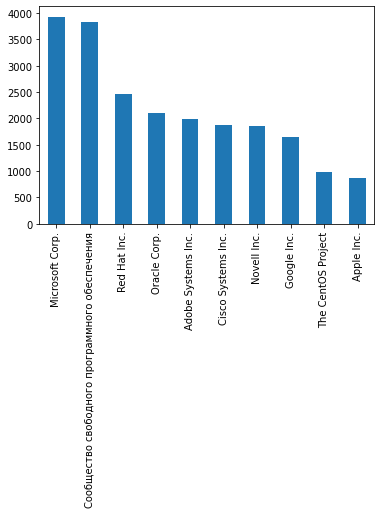

In [37]:
df2['Вендор ПО'].value_counts()[:10].plot(kind='bar')

In [38]:
import matplotlib.pyplot as plt

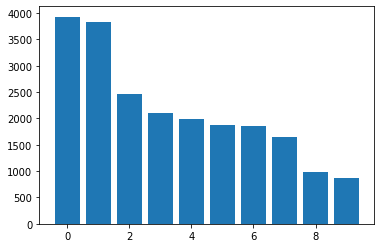

In [39]:
plt.bar(x=range(10),height=df2['Вендор ПО'].value_counts()[:10])
plt.show()

In [40]:
df2[df2['Наименование уязвимости'].apply(lambda x:x.find("облач"))!=-1].shape

(40, 22)

## Ссылки <a name='refs'></a>

- https://bdu.fstec.ru
- https://pandas.pydata.org
- https://github.com/yurichernyshov/Data-Science-Course-USURT/blob/master/lessons/100%20questions%20Pandas.ipynb

<a href='#toc'>Назад к оглавлению</a>